In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df=pd.read_csv('twitter_training.csv',names=['id', 'Entity', 'label', 'text'])
df

,id,Entity,label,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
df=df.drop(['id'],axis=1)
df=df.dropna()
df=df.drop_duplicates()
df

,Entity,label,text
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...
74677,Nvidia,Positive,Just realized that the Windows partition of my...
74678,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
import pandas as pd
import plotly.express as px
cat_counts = df['Entity'].value_counts().reset_index()
cat_counts.columns = ['Entity', 'Count']
cat_counts = cat_counts.sort_values(by='Count', ascending=False).head(20)
fig = px.bar(cat_counts, x='Entity', y='Count', title='Top 20 Count of Each Entity',
             labels={'Count': 'Number of Occurrences', 'Entity': 'Entity'},
             color_discrete_sequence=['lightcoral']) # Set the color to light red

fig.show()

In [6]:
import pandas as pd
import plotly.express as px
cat_counts = df['label'].value_counts().reset_index()
cat_counts.columns = ['label', 'Count']
cat_counts = cat_counts.sort_values(by='Count', ascending=False).head(20)
fig = px.bar(cat_counts, x='label', y='Count', title='Count of Each label',
             labels={'Count': 'Number of Occurrences', 'label': 'label'},
                         color='label', # Assign colors based on the 'Sentiment' column
             color_discrete_map={
                 'Negative': 'red',
                 'Positive': 'green',
                 'Neutral': 'yellow'
             })

fig.show()

In [7]:
df['label'].value_counts()

,count
label,
Negative,21565
Positive,19549
Neutral,17398
Irrelevant,12446


In [8]:
import re
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
  text = re.sub(r'http\S+', '', text)
  text = re.sub(r'(\w)\1{2,}', r'\1\1', text)
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  text = re.sub(r'@\S+', '', text)
  text = re.sub(r'[^\x00-\x7F]+', '', text)
  text=text.replace('not good', 'bad')
  text=text.replace('not bad', 'good')
  text=text.replace('not ok', 'ok')
  words = text.split()
  lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in words]
  lemmatized_words = [word for word in lemmatized_words if len(word) >= 3]

  processed_text = " ".join(lemmatized_words)
  return processed_text.strip()
df['text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
df

,Entity,label,text
0,Borderlands,Positive,get borderlands and will murder you all
1,Borderlands,Positive,come the border and will kill you all
2,Borderlands,Positive,get borderlands and will kill you all
3,Borderlands,Positive,come borderlands and will murder you all
4,Borderlands,Positive,get borderlands and will murder you all
...,...,...,...
74677,Nvidia,Positive,Just realize that the Windows partition Mac li...
74678,Nvidia,Positive,Just realize that Mac window partition years b...
74679,Nvidia,Positive,Just realize the windows partition Mac now yea...
74680,Nvidia,Positive,Just realize between the windows partition Mac...


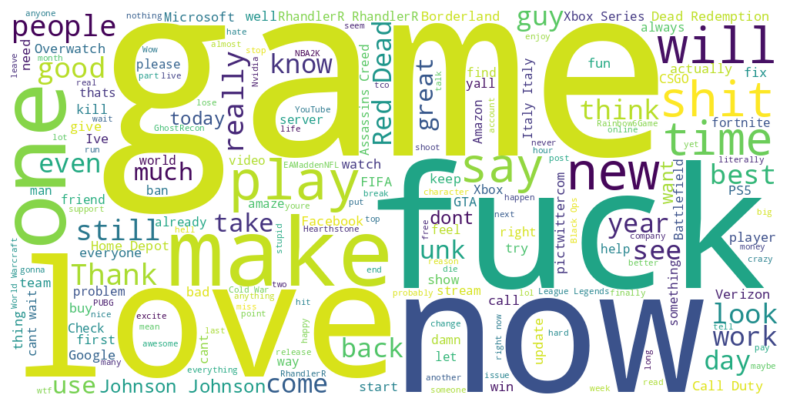

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = " ".join(df['text'].astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [11]:
df['label'] = df['label'].replace({'Positive': 5, 'Negative': -1, 'Neutral': 1, 'Irrelevant': 0})

In [12]:
df.head()

,Entity,label,text
0,Borderlands,5,get borderlands and will murder you all
1,Borderlands,5,come the border and will kill you all
2,Borderlands,5,get borderlands and will kill you all
3,Borderlands,5,come borderlands and will murder you all
4,Borderlands,5,get borderlands and will murder you all


In [13]:
df.info()
df['label']=df['label'].astype(int)

<class 'pandas.core.frame.DataFrame'>
Index: 70958 entries, 0 to 74681
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Entity  70958 non-null  object
 1   label   70958 non-null  int64 
 2   text    70958 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred_test = nb_classifier.predict(X_test)
y_pred_train = nb_classifier.predict(X_train)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))


Test Accuracy: 0.697435174746336
Train Accuracy: 0.7571081281048515


Test Accuracy: 0.910935738444194
Train Accuracy: 0.9821548109784025


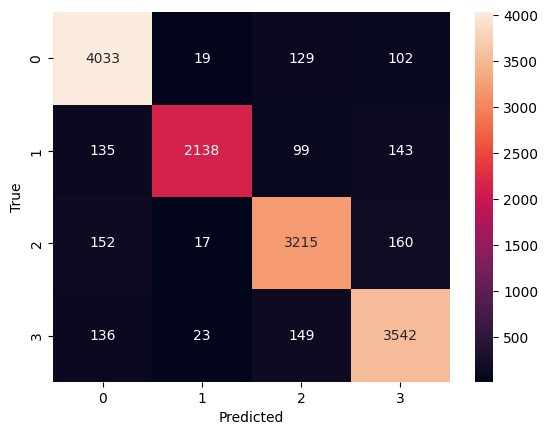

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_test = rf_classifier.predict(X_test)
y_pred_train = rf_classifier.predict(X_train)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [39]:
report = classification_report(y_test, y_pred_test)
print(report)

              precision    recall  f1-score   support

          -1       0.91      0.94      0.92      4283
           0       0.97      0.85      0.91      2515
           1       0.90      0.91      0.90      3544
           5       0.90      0.92      0.91      3850

    accuracy                           0.91     14192
   macro avg       0.92      0.90      0.91     14192
weighted avg       0.91      0.91      0.91     14192



Test Accuracy: 0.7540163472378805
Train Accuracy: 0.9821548109784025


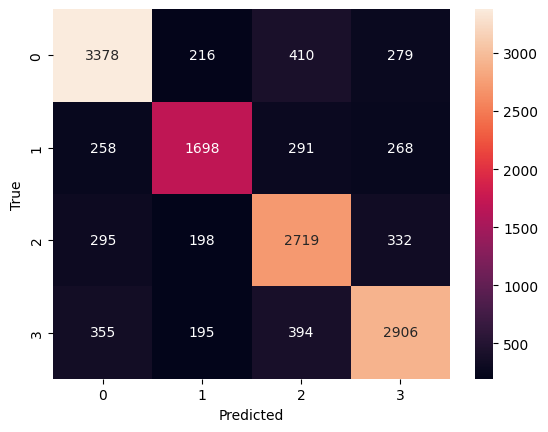

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred_test = dt_classifier.predict(X_test)
y_pred_train = dt_classifier.predict(X_train)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Test Accuracy: 0.867249154453213
Train Accuracy: 0.9317373075432477


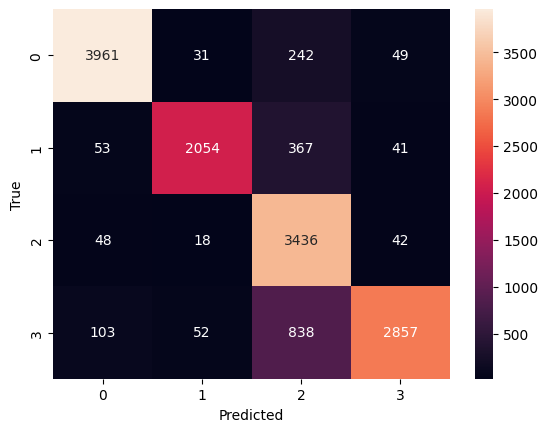

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

from sklearn.metrics import accuracy_score
accuracy_test = accuracy_score(y_test, y_pred)

print("Test Accuracy:", accuracy_test)

accuracy_train = accuracy_score(y_train, knn.predict(X_train))
print("Train Accuracy:", accuracy_train)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [32]:
def test(text_list):

    df_test = pd.DataFrame({'text': text_list})

    # Apply the preprocessing function to each text in the DataFrame
    df_test['text'] = df_test['text'].apply(preprocess_text)
    print(df_test['text'] )
    # Transform the text data into the appropriate format for the classifier
    X_test = vectorizer.transform(df_test['text'])

    # Make predictions using the trained classifier
    predictions = rf_classifier.predict(X_test)


    return predictions

# Example text inputs
text = [
    "This movie is absolutely amazing and I highly recommend it.",
    "I am feeling very sad and disappointed today.",
    "The weather is nice and sunny, perfect for a picnic."
]

# Get predictions for the text inputs
pred = test(text)
print(pred)




0    This movie absolutely amaze and highly recommend
1                  feel very sad and disappoint today
2       The weather nice and sunny perfect for picnic
Name: text, dtype: object
[ 5 -1  5]


In [33]:

def test(text_list):
    # Convert the list of texts into a DataFrame
    df_test = pd.DataFrame({'text': text_list})

    # Apply the preprocessing function to each text in the DataFrame
    df_test['text'] = df_test['text'].apply(preprocess_text)

    # Transform the text data into the appropriate format for the classifier
    X_test = vectorizer.transform(df_test['text'])

    # Make predictions using the trained classifier
    predictions = rf_classifier.predict(X_test)

    # Map numerical predictions to sentiment labels
    sentiment_map = {-1: 'Negative', 0: 'Irrelevant', 5: 'Positive'}

    # Convert predictions to corresponding sentiment labels
    sentiment_labels = [sentiment_map.get(pred, 'Neutral') for pred in predictions]

    return sentiment_labels

# Example text inputs
text = [
    "This movie is absolutely amazing and I highly recommend it.",
    "I am feeling very sad and disappointed today.",
    "The weather is nice and sunny, perfect for a picnic."
]

# Get predictions for the text inputs
pred = test(text)
print(pred)


['Positive', 'Negative', 'Positive']


In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()